1. 기상자료개발포털에서 다운로드 받은 아래 데이터를 이용해 문제를 해결하시오
- (2010-2020) weather.xlsx
- 날짜 컬럼의 자료형을 날짜 형식으로 변경하시오
- 분석에 사용할 다음 컬럼을 필터링 한 후 새로운 데이터 프레임으로 생성하시오
    - date,temp,year,month,day
- year와 temp데이터에 대한 산점도를 그리고 선형성을 확인하시오
- 10년치의 9월1일의 데이터를 이용해 2023년 9월1일의 기온을 예측하는 코드를 완성하시오

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
weather = pd.read_excel('./data/(2010-2020) weather.xlsx')
weather.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2
2,2010-01-03,108,-6.8,-10.5,-3.2
3,2010-01-04,108,-5.9,-8.0,-3.4
4,2010-01-05,108,-9.9,-12.3,-7.0


In [10]:
# 날짜 컬럼의 자료형을 날짜 형식으로 변경하시오
weather['날짜'] = pd.to_datetime(weather['날짜'])
# 컬럼 생성
weather['year'] = weather['날짜'].dt.year
weather['month'] = weather['날짜'].dt.month
weather['day'] = weather['날짜'].dt.day
# 지점 컬럼 삭제
weather.drop('지점', axis=1, inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   평균기온(℃)  4018 non-null   float64       
 2   최저기온(℃)  4018 non-null   float64       
 3   최고기온(℃)  4017 non-null   float64       
 4   year     4018 non-null   int64         
 5   month    4018 non-null   int64         
 6   day      4018 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 219.9 KB


In [13]:
# 컬럼명 변경
weather.rename(columns= {'날짜':'date', '평균기온(℃)':'temp'}, inplace=True)

In [14]:
weather.head()

,date,temp,최저기온(℃),최고기온(℃),year,month,day
0,2010-01-01,-7.6,-12.7,-3.6,2010,1,1
1,2010-01-02,-3.6,-7.4,0.2,2010,1,2
2,2010-01-03,-6.8,-10.5,-3.2,2010,1,3
3,2010-01-04,-5.9,-8.0,-3.4,2010,1,4
4,2010-01-05,-9.9,-12.3,-7.0,2010,1,5


In [15]:
weather_fin = weather[['date','temp','year','month','day']]
weather_fin.head()

,date,temp,year,month,day
0,2010-01-01,-7.6,2010,1,1
1,2010-01-02,-3.6,2010,1,2
2,2010-01-03,-6.8,2010,1,3
3,2010-01-04,-5.9,2010,1,4
4,2010-01-05,-9.9,2010,1,5


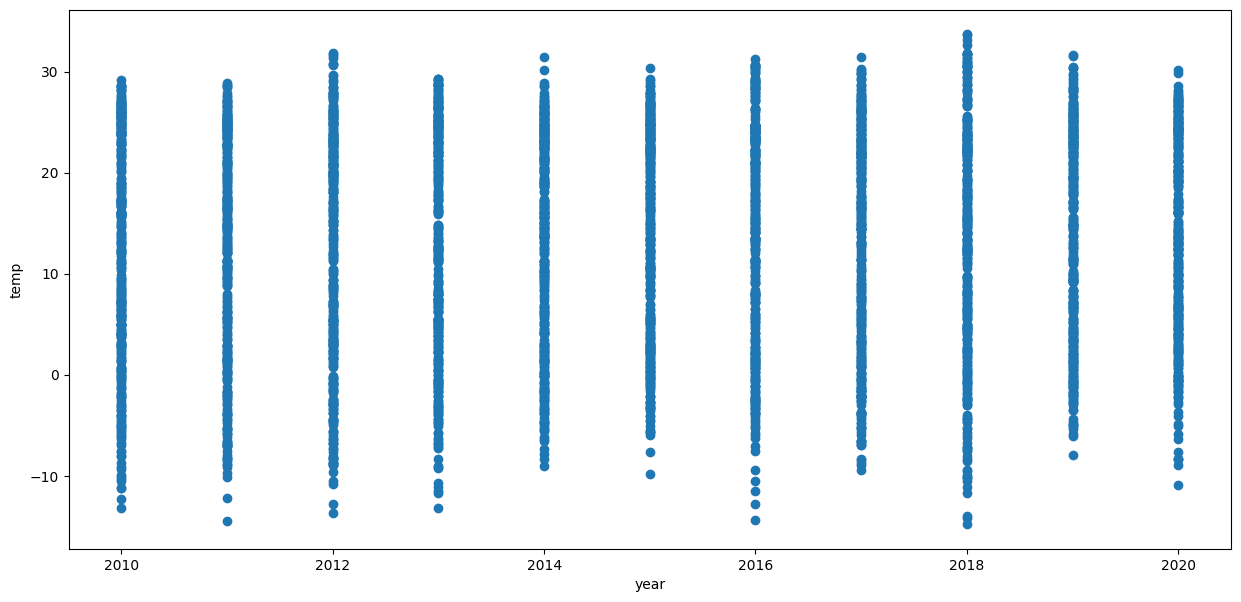

In [16]:
# year와 temp데이터에 대한 산점도를 그리고 선형성을 확인하시오
fig = plt.figure(figsize=(15,7))
X = weather_fin[['year']]
y = weather_fin[['temp']]
plt.xlabel('year')
plt.ylabel('temp')
plt.scatter(X,y)
plt.show()

In [22]:
cond = (weather['date'].dt.month==9) & (weather['date'].dt.day==1)
cond
df_fin = weather_fin[cond]
df_fin

,date,temp,year,month,day
243,2010-09-01,26.0,2010,9,1
608,2011-09-01,27.0,2011,9,1
974,2012-09-01,25.2,2012,9,1
1339,2013-09-01,23.5,2013,9,1
1704,2014-09-01,24.1,2014,9,1
2069,2015-09-01,25.9,2015,9,1
2435,2016-09-01,23.2,2016,9,1
2800,2017-09-01,23.3,2017,9,1
3165,2018-09-01,25.5,2018,9,1
3530,2019-09-01,23.7,2019,9,1


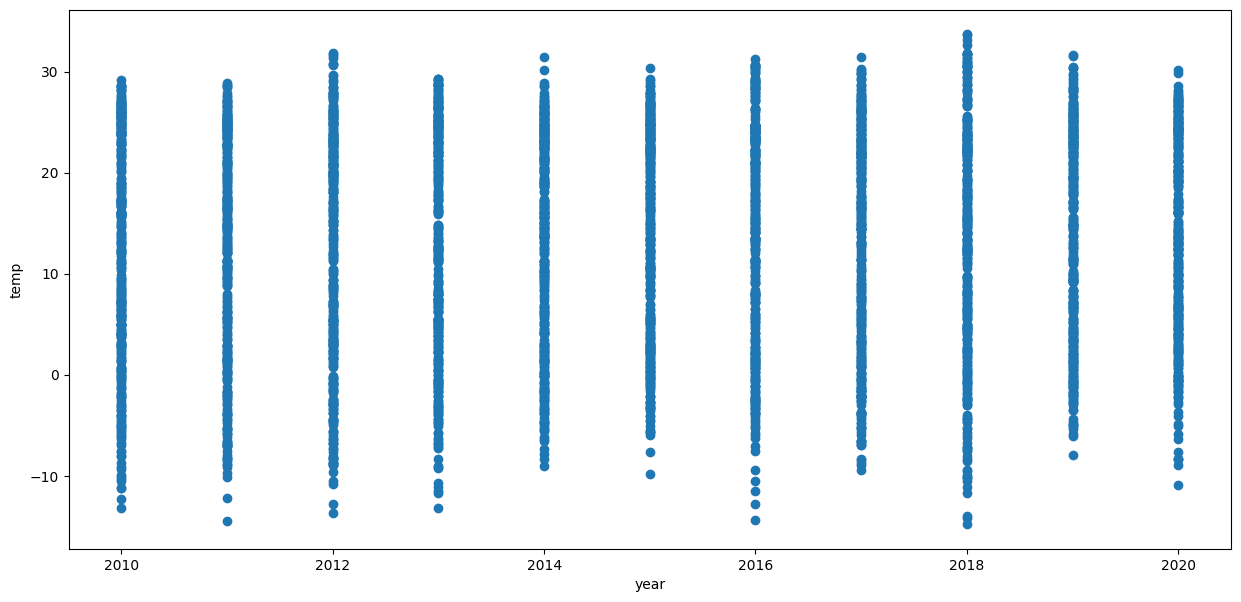

In [23]:
fig = plt.figure(figsize = (15,7))
X = weather_fin[['year']]
Y = weather_fin[['temp']]
plt.xlabel('year')
plt.ylabel('temp')
plt.scatter(X,Y)
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,7))
X = weather_fin[['year']]
Y = weather_fin[['temp']]
plt.xlabel('year')
plt.ylabel('temp')
plt.scatter(X,Y)
plt.show()

In [25]:
# 10년치의 9월1일의 데이터를 이용해 2023년 9월1일의 기온을 예측하는 코드를 완성하시오
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = df_fin[['year']]
y = df_fin[['temp']]
model.fit(x,y)
res = model.predict([[2023]])
res

C:\Users\jihye\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[24.13818182]])

In [ ]:
df_fin.info()

2. 아래 파일의 데이터를 load 한 후 문제를 해결하시오
    - health_screenings_2020_1000ea.xlsx
- 키에 의해 몸무게는 결정된다는 가정 하에 키특성을 이용해 몸무게를 예측하는 모델을 구성하시오
- 키 185cm의 몸무게를 예측하시오
- 키 데이터를 이용해 구성한 모델로 몸무게를 예측하고 아래 내용을 포함하는 그래프를 그리시오
    - 키데이터와 몸무게의 산점도
    - 키 데이터와 예측된 몸무게의 lineplot
- 위에서 그린 직선을 seaborn 모듈을 이용하여 추세선으로 표현하시오

In [29]:
df = pd.read_excel('./data/health_screenings_2020_1000ea.xlsx')
df.head()

,year,city_code,gender,age_code,height,weight
0,2020,11,1,10,175,65
1,2020,11,2,15,150,60
2,2020,41,2,15,155,60
3,2020,41,1,9,165,60
4,2020,31,1,9,160,55


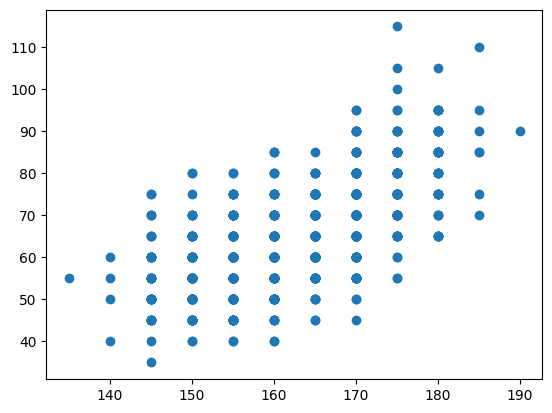

In [30]:
x = df['height']
y = df['weight']
plt.plot(x,y,'o')
plt.show()

In [31]:
model = LinearRegression()
model.fit(x.values.reshape(-1,1),y)

LinearRegression()

In [32]:
model.predict([[185]])

array([82.81082122])

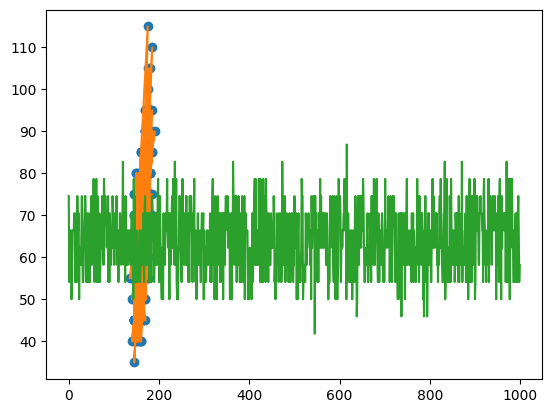

In [33]:
plt.plot(x,y,'o')
plt.plot(x,y,model.predict(x.values.reshape(-1,1)))
plt.show()

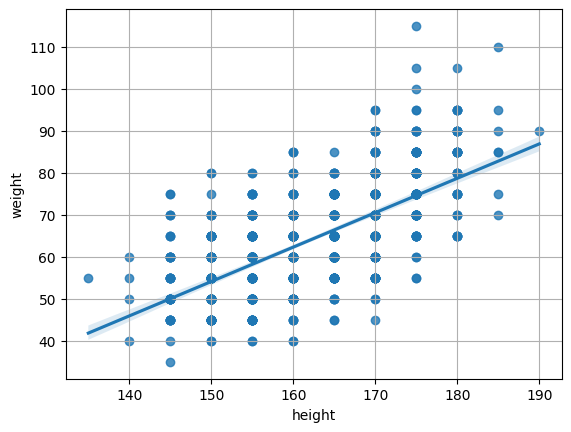

In [34]:
sns.regplot(x='height', y='weight', data=df)
plt.grid()
plt.show()

3. 아래 파일 데이터를 load한 후 문제를 해결하시오
    - manhattan.csv
- 미국 뉴욕시 중심부인 맨해튼의 주택 임대료가 역대 최고치를 경신했다. 이는 코로나 19 대확산시기 도시를 떠났던 이들이 하나둘 돌아오고 주택담보대출 금리가 급등한 영향때문이라고 뉴욕 타임스가 9일 보도했다
- 부동산 회사 더글러스 엘리먼에 따르면 맨해튼의 주택 월간임대료 중간값은 5월에 4천달러로 지난해 같은 달보다 25.2% 오르며 사상 최고를 기록했다
- 맨해튼의 데이터를 분석해서 임대료에 영향을 미치는 요소가 무엇인기 그리고 그 요인들과의 관계를 분석해 임대료를 예측해 보자
- 주어진 데이터에 대해 7:3 비율로 분리하고 데이터의 관계성을 확인한 후 임대료를 예측하는 모델을 구성하시오